<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Research Topic: Event Study of Dividend Announcement Day Effects on NASDAQ Index Component Stocks Before and After the COVID-19 Pandemic Outbreak</h1>
<h3 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Author: JeffLin99, Email: jeffhengyu1999@hotmail.com</h3>

## Problem Description
#### In this project, the goal is to address the following problem and propose a corresponding solution.

1. Problem Background； 
     <div>&ensp;&ensp;&ensp;&ensp;Dividend distribution is common in the stock market, where companies share profits with shareholders through cash or stock dividends. Dividends can be interim (before annual reports) or final (after annual reports). How companies decide on dividend policies impacts their future performance. Managers aim to maximize shareholder wealth, but the effect of dividend policy on shareholder wealth is debated. Generally, stock prices drop with lower dividends and rise with higher dividends due to signaling effects. Dividends convey information about a company's future performance to investors. According to the Dividend Signaling Theory, dividends signal the company's condition to shareholders. Recent studies confirm this theory, showing abnormal returns around dividend announcement days. This theory is based on information asymmetry between management and shareholders. Shareholders analyze dividend patterns to make investment decisions when dividends are announced.<div>
<div>&ensp;<div>
  2. Research Incentive；  
     <div>&ensp;&ensp;&ensp;&ensp;
In early 2020, the COVID-19 pandemic caused global turmoil, leading to economic slowdown and various societal impacts. To mitigate its effects, countries implemented diverse measures. However, the economic consequences persisted. Layoffs and financial difficulties affected both individuals and stock investors. This situation potentially influenced capital market volatility. Previous research shows that economic downturns can amplify the effectiveness of dividend signaling theory. Thus, studying COVID-19's impact on stock market volatility compared to before can inform future research. Focusing on the NASDAQ index and its components, this study delves into two key questions.<div>
<div>&ensp;<div>
  3. Key Questions to Find Out； 
     <div>&ensp;&ensp;&ensp;&ensp;
         Question 1: How did the abnormal returns of listed companies in the NASDAQ, within ±5 days of cash dividend announcement, compare before and during the COVID-19 pandemic?<div>
     <div>&ensp;&ensp;&ensp;&ensp;
         Question 2: What differences are observed in the market's reaction to dividend announcements before and during the COVID-19 pandemic?<div>

### Packages from third-party tool libraries used:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from yahoo_fin.stock_info import *

## Market data: Nasdaq Index
#### Data source: Investing.com
<p> https://www.investing.com/indices/nasdaq-composite-historical-data </p>

#### Data range：2018-01-01 to 2021-01-06

In [2]:
nasdaq = pd.read_csv('Data\\NASDAQ Composite Historical Data.csv', parse_dates=['Date'])
nasdaq['Price'] = [i.replace(',','') for i in nasdaq['Price']]
nasdaq['Price'] = nasdaq['Price'].astype(float)
nasdaq['Mktret'] = (nasdaq['Price']/nasdaq.shift(1)['Price'])-1
nasdaq.rename(columns={'Date':'Trddt'},inplace=True)
nasdaq = nasdaq[['Trddt','Price','Mktret']]
nasdaq

,Trddt,Price,Mktret
0,2018-01-02,7006.90,NaN
1,2018-01-03,7065.53,0.008367
2,2018-01-04,7077.91,0.001752
3,2018-01-05,7136.56,0.008286
4,2018-01-08,7157.39,0.002919
...,...,...,...
754,2020-12-30,12870.00,0.001539
755,2020-12-31,12888.28,0.001420
756,2021-01-04,12698.45,-0.014729
757,2021-01-05,12818.96,0.009490


### Nasdaq Index-Descriptive Statistics

In [3]:
nasdaq.describe()

,Price,Mktret
count,759.000000,758.000000
mean,8542.911989,0.000918
std,1536.385420,0.016025
min,6192.920000,-0.123213
25%,7456.430000,-0.004648
50%,7973.390000,0.001697
75%,9188.720000,0.008326
max,12899.420000,0.093460


### Historical graph of Nasdaq Index

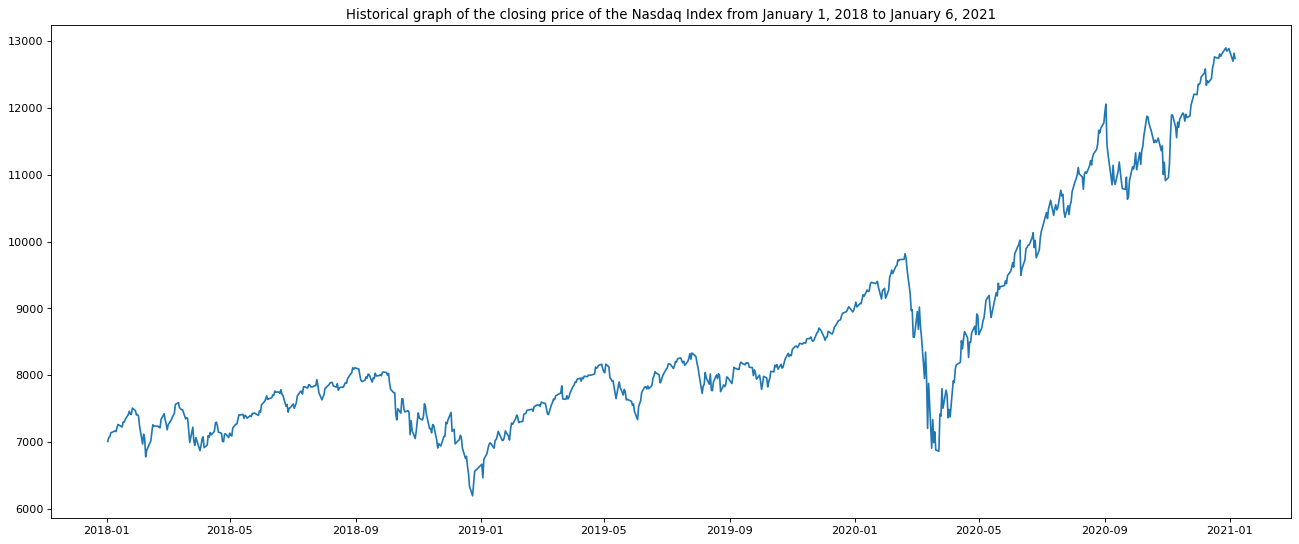

In [4]:
plt.figure(figsize=(20,8),dpi=80)
plt.plot(nasdaq.set_index('Trddt')['Price'])
plt.title('Historical graph of the closing price of the Nasdaq Index from January 1, 2018 to January 6, 2021')
plt.show()

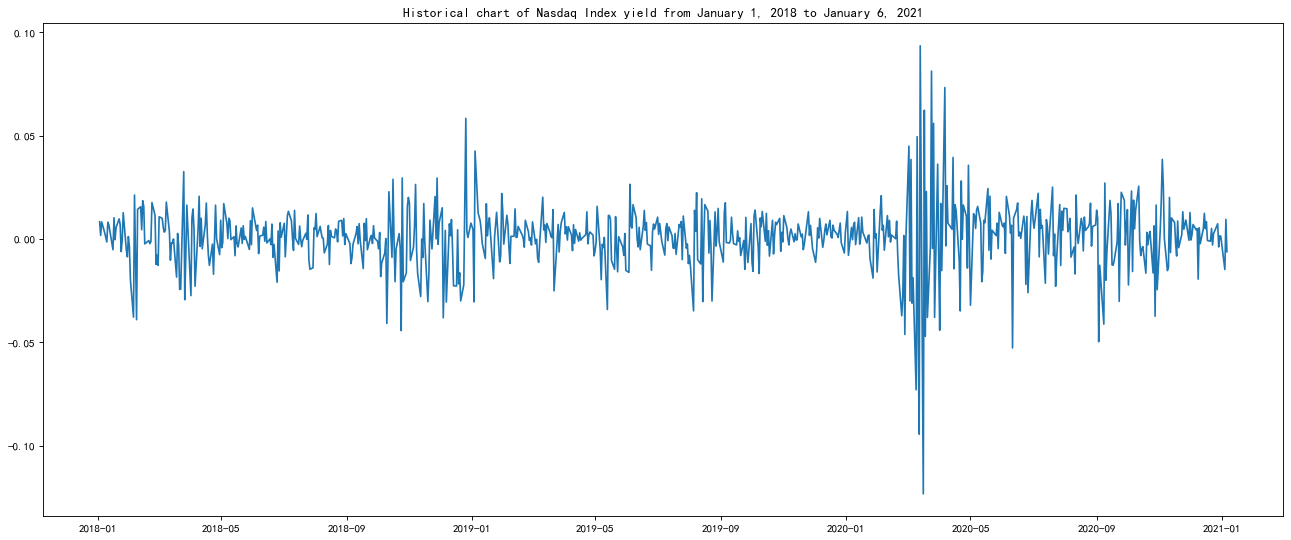

In [5]:
plt.figure(figsize=(20,8),dpi=80)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(nasdaq.set_index('Trddt')['Mktret'])
plt.title('Historical chart of Nasdaq Index yield from January 1, 2018 to January 6, 2021')
plt.show()

## Stock data: Nasdaq stocks
Data Source：Yahoo Finance
#### Data range：2018-01-01 至 2021-01-06

##### Note: Below coding will take long time to finish the data extraction, nonetheless, the output of the data has already been saved (See attached file). Please proceed to the next code.

In [59]:
# tickers = tickers_nasdaq()
# stock_data = pd.DataFrame()

# for i in tickers:
#     try:
#         stk_data = pd.DataFrame(get_data(i, start_date='01/01/2018',end_date='01/06/2021')).reset_index().rename(columns={'index':'date'})
#         stock_data = pd.concat((stock_data,stk_data), axis=0)
#     except:
#         pass
# stock_data

,date,open,high,low,close,adjclose,volume,ticker
0,2018-01-02,4.650000,5.500000,4.650000,5.430000,0.581785,44800,AACG
1,2018-01-03,5.330000,5.340000,5.150000,5.340000,0.572143,3000,AACG
2,2018-01-04,5.220000,5.450000,5.220000,5.400000,0.578571,11100,AACG
3,2018-01-05,5.390000,5.720000,5.210000,5.400000,0.578571,17400,AACG
4,2018-01-08,5.490000,5.500000,5.270000,5.270000,0.564643,2600,AACG
...,...,...,...,...,...,...,...,...
753,2020-12-29,12.090909,12.290909,11.818182,12.109091,11.976290,543620,ZYXI
754,2020-12-30,12.127273,12.809091,12.127273,12.781818,12.641639,487850,ZYXI
755,2020-12-31,12.709091,12.745455,12.145455,12.236364,12.102167,318230,ZYXI
756,2021-01-04,12.372727,13.036364,12.300000,12.618182,12.479797,718300,ZYXI


#### Read stocks data

In [6]:
# stock_data.to_csv('NASDAQ_TRD_Dalyr.csv',index=False)
stock_data = pd.read_csv('Data\\NASDAQ_TRD_Dalyr.csv',parse_dates=['date'])
stock_data.rename(columns={'date':'Trddt'},inplace=True)
stock_data.sort_values(['ticker','Trddt'],inplace=True)
stock_data = stock_data[stock_data['volume'] != 0]   # Exclude data with zero transaction volume
stock_data

,Trddt,open,high,low,close,adjclose,volume,ticker
0,2018-01-02,4.650000,5.500000,4.650000,5.430000,0.581785,44800,AACG
1,2018-01-03,5.330000,5.340000,5.150000,5.340000,0.572143,3000,AACG
2,2018-01-04,5.220000,5.450000,5.220000,5.400000,0.578571,11100,AACG
3,2018-01-05,5.390000,5.720000,5.210000,5.400000,0.578571,17400,AACG
4,2018-01-08,5.490000,5.500000,5.270000,5.270000,0.564643,2600,AACG
...,...,...,...,...,...,...,...,...
2116397,2020-12-29,12.090909,12.290909,11.818182,12.109091,11.976290,543620,ZYXI
2116398,2020-12-30,12.127273,12.809091,12.127273,12.781818,12.641639,487850,ZYXI
2116399,2020-12-31,12.709091,12.745455,12.145455,12.236364,12.102167,318230,ZYXI
2116400,2021-01-04,12.372727,13.036364,12.300000,12.618182,12.479797,718300,ZYXI


#### Calculate the yield on stocks

In [7]:
def cal_ret(data):
    ret = data[['Trddt','adjclose']]
    ret['Dretwd'] = data['adjclose']/data.shift(1)['adjclose']-1
    ret.dropna(axis=0,inplace=True)
    ret = ret[['Trddt','Dretwd']]
    return ret
stock_data2 = pd.DataFrame(stock_data.groupby('ticker').apply(cal_ret)).reset_index()
del stock_data2['level_1']
stock_data2.rename(columns={'adjclose':'Dretwd'},inplace=True)
stock_data2

,ticker,Trddt,Dretwd
0,AACG,2018-01-03,-0.016575
1,AACG,2018-01-04,0.011236
2,AACG,2018-01-05,0.000000
3,AACG,2018-01-08,-0.024074
4,AACG,2018-01-09,0.009488
...,...,...,...
2049163,ZYXI,2020-12-29,-0.016974
2049164,ZYXI,2020-12-30,0.055556
2049165,ZYXI,2020-12-31,-0.042674
2049166,ZYXI,2021-01-04,0.031204


### NASDAQ Stocks-Descriptive Statistics

In [8]:
stock_data2.describe()

,Dretwd
count,2.049168e+06
mean,1.685664e-03
std,3.202926e-01
min,-9.920000e-01
25%,-1.398243e-02
50%,0.000000e+00
75%,1.343080e-02
max,3.490000e+02


#### Merge market and stocks data

In [9]:
prcdf = pd.merge(stock_data2,nasdaq[['Trddt','Mktret']],on=['Trddt'],how='inner')
prcdf

,ticker,Trddt,Dretwd,Mktret
0,AACG,2018-01-03,-0.016575,0.008367
1,AADR,2018-01-03,0.010448,0.008367
2,AAL,2018-01-03,-0.012266,0.008367
3,AAME,2018-01-03,0.030769,0.008367
4,AAOI,2018-01-03,-0.000528,0.008367
...,...,...,...,...
2049163,ZTEK,2018-06-20,0.000000,0.007240
2049164,ZUMZ,2018-06-20,0.011516,0.007240
2049165,ZYME,2018-06-20,-0.029308,0.007240
2049166,ZYNE,2018-06-20,0.092916,0.007240


## Event study data: Announcement of dividend distribution of listed companies with constituent stocks of the Nasdaq Index
Data source：Yahoo Finance
#### Data range：2018-01-01 to 2020-12-31

##### Note: Below coding will take long time to finish the data extraction, nonetheless, the output of the data has already been saved (See attached file). Please proceed to the next code.

In [5]:
# div_data = pd.DataFrame()
# tickers = tickers_nasdaq()

# for i in tickers:
#     try:
#         div_info_2018 = pd.DataFrame(get_dividends(i,start_date = '2018-01-01', end_date = '2018-12-31').reset_index().rename(columns={'index':'Annodt'})).drop_duplicates(subset=['ticker'],keep='last')
#         div_info_2019 = pd.DataFrame(get_dividends(i,start_date = '2019-01-01', end_date = '2019-12-31').reset_index().rename(columns={'index':'Annodt'})).drop_duplicates(subset=['ticker'],keep='last')
#         div_info_2020 = pd.DataFrame(get_dividends(i,start_date = '2020-01-01', end_date = '2020-12-31').reset_index().rename(columns={'index':'Annodt'})).drop_duplicates(subset=['ticker'],keep='last')
#         div_data = pd.concat((div_data,div_info_2018), axis=0).reset_index(drop=True)
#         div_data = pd.concat((div_data,div_info_2019), axis=0).reset_index(drop=True)
#         div_data = pd.concat((div_data,div_info_2020), axis=0).reset_index(drop=True)
#     except:
#         pass
# div_data

,Annodt,dividend,ticker
0,2018-08-27,6.000000,AACG
1,2018-06-25,0.284000,AADR
2,2019-09-25,0.008000,AADR
3,2020-09-24,0.067000,AADR
4,2018-11-05,0.100000,AAL
...,...,...,...
3354,2020-11-30,0.394000,ZIONO
3355,2018-11-29,0.252800,ZIONP
3356,2019-11-27,0.252800,ZIONP
3357,2020-11-30,0.252778,ZIONP


#### Read the data of stock dividend distribution announcement

In [10]:
# div_data.to_csv('NASDAQ_DivData.csv',index=False)
div_data = pd.read_csv('Data\\NASDAQ_DivData.csv',parse_dates=['Annodt'])
div_data

,Annodt,dividend,ticker
0,2018-08-27,6.000000,AACG
1,2018-06-25,0.284000,AADR
2,2019-09-25,0.008000,AADR
3,2020-09-24,0.067000,AADR
4,2018-11-05,0.100000,AAL
...,...,...,...
3354,2020-11-30,0.394000,ZIONO
3355,2018-11-29,0.252800,ZIONP
3356,2019-11-27,0.252800,ZIONP
3357,2020-11-30,0.252778,ZIONP


### Announcement of Dividend Distribution of Nasdaq Stocks--Descriptive Statistics

In [11]:
div_data.describe()

,dividend
count,3359.000000
mean,0.320102
std,0.663220
min,0.001000
25%,0.100000
50%,0.184500
75%,0.351500
max,15.440000


## Define Event

#### In this study, the focus is on the abnormal return of the dividend announcement event on the stock price. The dividend event is defined as the event where the dividend remains unchanged, decreases, and increases according to the changes in the current period of the dividend per share and the previous period year-on-year. The event type codes (eventcodes) are defined as 1, 2, and 3, respectively. The results are as follows：

In [12]:
evtdf = div_data
evtdf['unchanged'] = [int(i) for i in evtdf['dividend'] == evtdf.groupby('ticker')['dividend'].shift(1)]
evtdf['decrease'] = [int(i) for i in evtdf['dividend'] < evtdf.groupby('ticker')['dividend'].shift(1)]
evtdf['increase'] = [int(i) for i in evtdf['dividend'] > evtdf.groupby('ticker')['dividend'].shift(1)]
evtdf['decrease'] = [int(i) for i in [str(i).replace('1','0') for i in evtdf['decrease'] + 1]]
evtdf['increase'] = [int(i) for i in [str(i).replace('2','0') for i in evtdf['increase'] + 2]]
evtdf['eventcode'] = evtdf['unchanged'] + evtdf['increase'] + evtdf['decrease']
evtdf = evtdf[evtdf['Annodt'] >= '2019-01-01']   # Select the interval in which the event research occurred
evtdf = evtdf[['ticker','Annodt','eventcode']]
evtdf = evtdf[evtdf['eventcode'] != 0]   # Excluding data with an eventcode of zero, the meaning is to exclude data on individual stocks that have only appeared once or interrupted dividend announcements in 18/19/20, making it impossible to compare.
evtdf

,ticker,Annodt,eventcode
2,AADR,2019-09-25,2
3,AADR,2020-09-24,3
5,AAL,2019-11-05,1
6,AAL,2020-02-04,1
8,AAME,2019-04-09,1
...,...,...,...
3351,ZIONL,2020-11-30,1
3353,ZIONO,2019-11-27,1
3354,ZIONO,2020-11-30,1
3356,ZIONP,2019-11-27,1


#### Define the maximum number of dividend announcements (max_len) that appear in individual stocks. Since this study uses the final dividend of the year as the data set, and the range is from January 1, 2019 to December 31, 2020, max_len = 2.However, in future studies, assumptions can be relaxed to consider medium-term dividends.

In [13]:
def length(data):
    return len(data['Annodt'].unique())

max_len = max(evtdf.groupby('ticker').apply(length))
max_len

2

#### Define the order/number of dividend announcements that appear in each stock to be marked (Count)

In [14]:
new_evtdf = pd.DataFrame()
for i in evtdf['ticker'].unique():
    data = evtdf[evtdf['ticker'] == i]
    k = 1
    for j in data['Annodt'].unique():
        data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
        k+=1
    new_evtdf = pd.concat((new_evtdf,data),axis=0)
new_evtdf

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[data['Annodt']==j].index,'Count'] = int(k)
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\4216522225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,ticker,Annodt,eventcode,Count
2,AADR,2019-09-25,2,1.0
3,AADR,2020-09-24,3,2.0
5,AAL,2019-11-05,1,1.0
6,AAL,2020-02-04,1,2.0
8,AAME,2019-04-09,1,1.0
...,...,...,...,...
3351,ZIONL,2020-11-30,1,2.0
3353,ZIONO,2019-11-27,1,1.0
3354,ZIONO,2020-11-30,1,2.0
3356,ZIONP,2019-11-27,1,1.0


#### Through the above two results, the date of the dividend announcement for each stock in 2019 and 2020, as well as its eventcode, are divided.

In [15]:
start_year = 2019
k = start_year
for i in range(1,max_len+1):
    data = new_evtdf[new_evtdf['Count'] == i]
    new_evtdf.loc[data.index,'Annodt_'+str(k)] = data['Annodt']
    k+=1
new_evtdf1 = new_evtdf.drop(columns=['Annodt','Count'])
new_evtdf1

,ticker,eventcode,Annodt_2019,Annodt_2020
2,AADR,2,2019-09-25,NaT
3,AADR,3,NaT,2020-09-24
5,AAL,1,2019-11-05,NaT
6,AAL,1,NaT,2020-02-04
8,AAME,1,2019-04-09,NaT
...,...,...,...,...
3351,ZIONL,1,NaT,2020-11-30
3353,ZIONO,1,2019-11-27,NaT
3354,ZIONO,1,NaT,2020-11-30
3356,ZIONP,1,2019-11-27,NaT


#### Merge the latest event research data mentioned above with the previous stock merged data again

In [16]:
prcevt = pd.merge(prcdf,new_evtdf1,how='inner',on=['ticker'])
prcevt

,ticker,Trddt,Dretwd,Mktret,eventcode,Annodt_2019,Annodt_2020
0,AADR,2018-01-03,0.010448,0.008367,2,2019-09-25,NaT
1,AADR,2018-01-03,0.010448,0.008367,3,NaT,2020-09-24
2,AADR,2018-01-04,0.003775,0.001752,2,2019-09-25,NaT
3,AADR,2018-01-04,0.003775,0.001752,3,NaT,2020-09-24
4,AADR,2018-01-05,0.007848,0.008286,2,2019-09-25,NaT
...,...,...,...,...,...,...,...
1518663,PARAA,2020-12-29,-0.005045,-0.003814,1,2020-12-14,NaT
1518664,PARAA,2020-12-30,0.003736,0.001539,1,2020-12-14,NaT
1518665,PARAA,2020-12-31,0.005584,0.001420,1,2020-12-14,NaT
1518666,PARAA,2021-01-04,-0.012956,-0.014729,1,2020-12-14,NaT


#### Calculate Trading Days Difference

In [17]:
for i in range(start_year,start_year+max_len):
    data = prcevt[['ticker','Trddt','Annodt_'+str(i)]].dropna(axis=0).reset_index(drop=True)
    evtsn = data.groupby('ticker').apply(lambda x:x[x['Trddt']>=x['Annodt_'+str(i)]].index[0])
    evtsn.name = 'evtsn'
    temp = pd.merge(data,evtsn,on='ticker',how='inner')
    temp['sn_'+str(i)] = temp.index-temp['evtsn']
    temp = temp[['ticker','Trddt','Annodt_'+str(i),'sn_'+str(i)]]
    prcevt = pd.merge(prcevt,temp,on=['ticker','Trddt','Annodt_'+str(i)],how='outer')
prcevt

,ticker,Trddt,Dretwd,Mktret,eventcode,Annodt_2019,Annodt_2020,sn_2019,sn_2020
0,AADR,2018-01-03,0.010448,0.008367,2,2019-09-25,NaT,-423.0,NaN
1,AADR,2018-01-03,0.010448,0.008367,3,NaT,2020-09-24,NaN,-675.0
2,AADR,2018-01-04,0.003775,0.001752,2,2019-09-25,NaT,-422.0,NaN
3,AADR,2018-01-04,0.003775,0.001752,3,NaT,2020-09-24,NaN,-674.0
4,AADR,2018-01-05,0.007848,0.008286,2,2019-09-25,NaT,-421.0,NaN
...,...,...,...,...,...,...,...,...,...
1518663,PARAA,2020-12-29,-0.005045,-0.003814,1,2020-12-14,NaT,10.0,NaN
1518664,PARAA,2020-12-30,0.003736,0.001539,1,2020-12-14,NaT,11.0,NaN
1518665,PARAA,2020-12-31,0.005584,0.001420,1,2020-12-14,NaT,12.0,NaN
1518666,PARAA,2021-01-04,-0.012956,-0.014729,1,2020-12-14,NaT,13.0,NaN


#### Define a market regression model that outputs a constant term (Alpha), regression coefficients (Beta) and a disturbance term (Resid)

In [18]:
def estimatemodel(data):
    model = sm.OLS(data['Dretwd'],sm.add_constant(data['Mktret'])).fit()
    result = model.params
    result['sig2_ar'] = model.mse_resid
    return result

#### Set the calendar of events for the estimated start (begest), the calendar of events for the estimated end (endest), the start date of the event (begevt) and the end date of the event (endevt)

In [19]:
begest = -120
endest = -6
begevt = -5
endevt = 5

#### Beginning of regression

In [20]:
evtdata = pd.DataFrame()
for i in range(start_year,start_year+max_len):
    ## Select the data under the estimation window
    estdata = prcevt.loc[(prcevt['sn_'+str(i)] >= begest) & (prcevt['sn_'+str(i)] <= endest),:]
    
    ## Make an estimate of each stock and output the result
    regresult = estdata.groupby('ticker').apply(estimatemodel)
    regresult.columns=['alpha_'+str(i),'beta_'+str(i),'sig2_ar_'+str(i)]
    
    ## Select the data of the interval in which the event occurred, and subtract the actual return on stocks from the estimated normal return on stocks under the market regression model to obtain the abnormal return on stocks (ar)
    temp=pd.merge(prcevt.loc[(prcevt['sn_'+str(i)]>=begevt) & (prcevt['sn_'+str(i)]<=endevt)],regresult,how='inner',on='ticker')
    temp['ar_'+str(i)] = temp['Dretwd']-temp['alpha_'+str(i)]-temp['beta_'+str(i)]*temp['Mktret']
    
    evtdata = pd.concat((evtdata,temp))
evtdata.fillna(0,inplace=True)
evtdata.reset_index(inplace=True,drop=True)

#### Cumulative abnormal returns (car) for the event interval are derived by accumulating abnormal returns (ar) by respective stock

In [21]:
for i in range(start_year,start_year+max_len):
    evtdata['car_'+str(i)] = evtdata.groupby('ticker')['ar_'+str(i)].apply(np.cumsum).values
evtdata

C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\1739057117.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  evtdata['car_'+str(i)] = evtdata.groupby('ticker')['ar_'+str(i)].apply(np.cumsum).values
C:\Users\Myth.God\AppData\Local\Temp\ipykernel_9696\1739057117.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(.

,ticker,Trddt,Dretwd,Mktret,eventcode,Annodt_2019,Annodt_2020,sn_2019,sn_2020,alpha_2019,beta_2019,sig2_ar_2019,ar_2019,alpha_2020,beta_2020,sig2_ar_2020,ar_2020,car_2019,car_2020
0,AADR,2019-09-18,-0.000816,-0.001054,2,2019-09-25 00:00:00,0,-5.0,0.0,0.000397,0.626771,0.000036,-0.000553,0.000000,0.000000,0.000000,0.000000,-0.000553,0.000000
1,AADR,2019-09-19,-0.000408,0.000671,2,2019-09-25 00:00:00,0,-4.0,0.0,0.000397,0.626771,0.000036,-0.001226,0.000000,0.000000,0.000000,0.000000,-0.001779,0.000000
2,AADR,2019-09-20,-0.001430,-0.007969,2,2019-09-25 00:00:00,0,-3.0,0.0,0.000397,0.626771,0.000036,0.003168,0.000000,0.000000,0.000000,0.000000,0.001389,0.000000
3,AADR,2019-09-23,-0.005524,-0.000642,2,2019-09-25 00:00:00,0,-2.0,0.0,0.000397,0.626771,0.000036,-0.005519,0.000000,0.000000,0.000000,0.000000,-0.004130,0.000000
4,AADR,2019-09-24,-0.004732,-0.014648,2,2019-09-25 00:00:00,0,-1.0,0.0,0.000397,0.626771,0.000036,0.004052,0.000000,0.000000,0.000000,0.000000,-0.000078,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22951,BSDE,2020-12-22,-0.003039,0.005132,2,0,2020-12-21 00:00:00,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000292,0.051515,0.000005,-0.003596,-0.002057,-0.001995
22952,BSDE,2020-12-24,0.000000,0.002633,2,0,2020-12-21 00:00:00,0.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000292,0.051515,0.000005,-0.000427,-0.002057,-0.002422
22953,BSDE,2020-12-28,0.000000,0.007395,2,0,2020-12-21 00:00:00,0.0,3.0,0.000000,0.000000,0.000000,0.000000,0.000292,0.051515,0.000005,-0.000673,-0.002057,-0.003095
22954,BSDE,2020-12-29,0.001525,-0.003814,2,0,2020-12-21 00:00:00,0.0,4.0,0.000000,0.000000,0.000000,0.000000,0.000292,0.051515,0.000005,0.001429,-0.002057,-0.001666


## Impact of events on equity portfolios：aggregation across stocks $\frac{1}{N} \sum_{i=1}^N{CAR_i(\tau_1,\tau_2)}$

#### Under circumstance where 'eventcode' is not considered

In [22]:
mean_car = []
for i in range(start_year,start_year+max_len):
    mean_car.append(evtdata.groupby(['sn_'+str(i)])['car_'+str(i)].mean())
mean_car = pd.DataFrame(mean_car).T
mean_car

,car_2019,car_2020
-5.0,-0.000794,-0.000219
-4.0,0.000065,0.002138
-3.0,0.000616,0.004415
-2.0,0.001088,0.005730
-1.0,0.001571,0.004107
0.0,-0.002479,0.000211
1.0,0.001882,0.003218
2.0,0.001378,0.003888
3.0,0.001387,0.003781
4.0,0.000319,0.001406


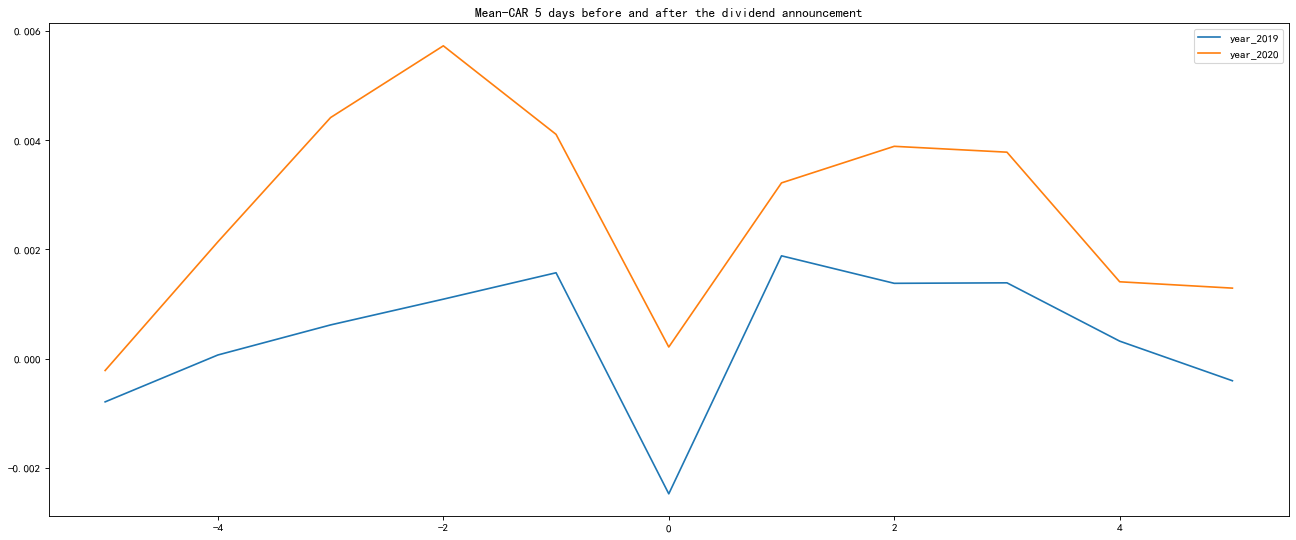

In [23]:
plt.figure(figsize=(20,8),dpi=80)
for i in range(start_year,start_year+max_len):
    plt.plot(evtdata.groupby(['sn_'+str(i)])['car_'+str(i)].mean(),label='year_'+str(i))
plt.title('Mean-CAR 5 days before and after the dividend announcement')
plt.legend()
plt.show()

### From the results point of view, the average cumulative abnormal earnings shown in the five days before and after the dividend announcement are a mean-CAR decline before the event, and a rebound immediately after the event and then a pullback.

#### Under circumstance where 'eventcode' is considered

In [24]:
carbycode = pd.DataFrame()
for i in range(start_year,start_year+max_len):
    carbycode = pd.concat((carbycode,evtdata.groupby(['eventcode','sn_'+str(i)])['car_'+str(i)].mean().reset_index()),axis=1)

In [25]:
carbycode = carbycode.T.drop_duplicates().T
carbycode.set_index(['eventcode','sn_2019'],inplace=True)
carbycode.rename(columns={'sn_2019':'sn'},inplace=True)
carbycode

car_2019  car_2020
eventcode sn_2019                    
1.0       -5.0    -0.001538 -0.000378
          -4.0    -0.001291  0.001978
          -3.0    -0.000924  0.003994
          -2.0    -0.000827  0.006338
          -1.0    -0.001410  0.003743
           0.0    -0.004303  0.000178
           1.0     0.000724  0.004439
           2.0    -0.000659  0.004407
           3.0    -0.001955  0.004961
           4.0    -0.002209 -0.000312
           5.0    -0.000975  0.000997
2.0       -5.0     0.000425 -0.001230
          -4.0     0.002172  0.001386
          -3.0     0.001071  0.000857
          -2.0     0.001873  0.001536
          -1.0     0.003752  0.002898
           0.0     0.002208  0.000215
           1.0     0.002196 -0.000477
           2.0     0.001840 -0.001563
           3.0     0.003182 -0.001478
           4.0     0.002867 -0.002131
           5.0     0.001832 -0.001378
3.0       -5.0    -0.000846  0.000711
          -4.0     0.000011  0.002868
          -3.0     0.001235  0.007573
          -2.0     0.001780  0.008489
          -1.0     0.002314  0.005373
           0.0    -0.004390  0.000227
           1.0     0.002358  0.005043
           2.0     0.002248  0.007697
           3.0     0.002449  0.006864
           4.0     0.000719  0.005662
           5.0    -0.000890  0.003630

#### Plot the average cumulative abnormal yield of all stocks in the range of events by days

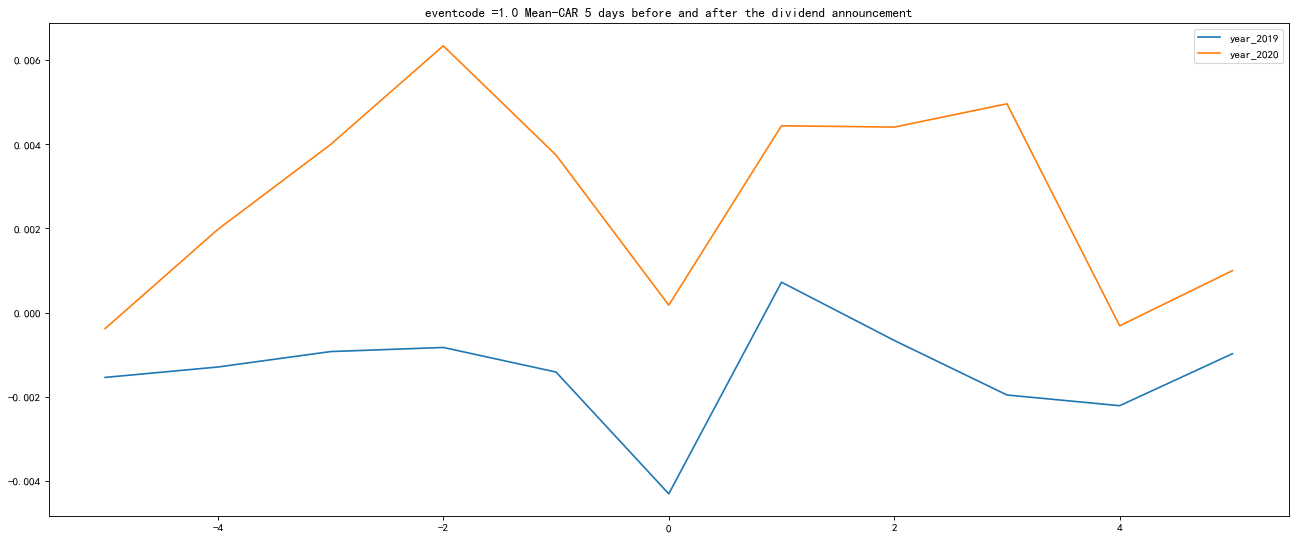

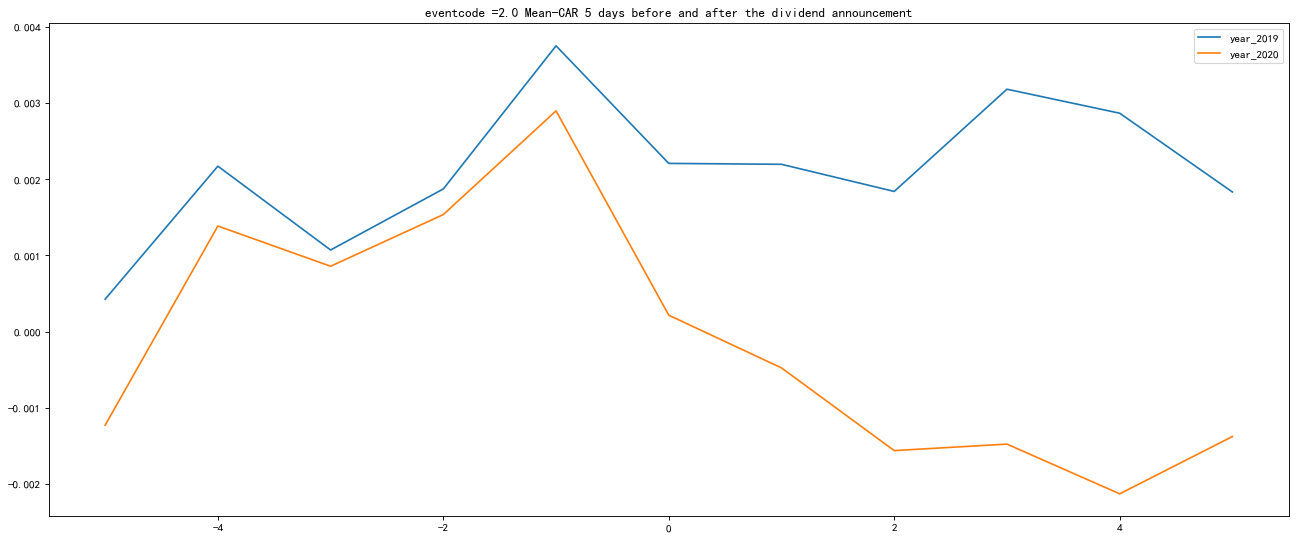

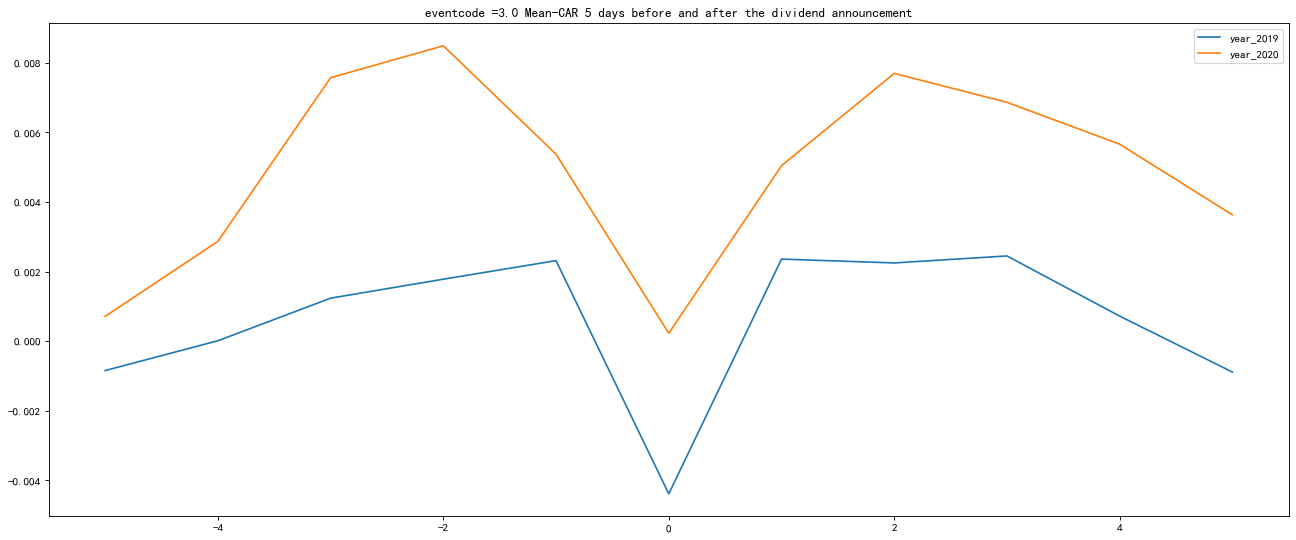

In [26]:
for i in carbycode.index.get_level_values('eventcode').unique():
    plt.figure(figsize=(20,8),dpi=80)
    for j in range(start_year,start_year+max_len):
        plt.plot(carbycode.loc[i]['car_'+str(j)],label='year_'+str(j))
    plt.title('eventcode ='+str(i)+' Mean-CAR 5 days before and after the dividend announcement')
    plt.legend()
    plt.show()

### Hypothesis testing: Null hypothesis: event has no effect on stock returns (including mean and variance)

#### Under circumstance where 'eventcode' is not considered

In [27]:
for i in range(start_year,start_year+max_len):
    evtdata['scar_'+str(i)] = evtdata['car_'+str(i)]/np.sqrt((evtdata['sn_'+str(i)]-begevt+1)*evtdata['sig2_ar_'+str(i)])
evtdata.replace([np.inf, -np.inf], np.nan, inplace=True)
evtdata

,ticker,Trddt,Dretwd,Mktret,eventcode,Annodt_2019,Annodt_2020,sn_2019,sn_2020,alpha_2019,...,sig2_ar_2019,ar_2019,alpha_2020,beta_2020,sig2_ar_2020,ar_2020,car_2019,car_2020,scar_2019,scar_2020
0,AADR,2019-09-18,-0.000816,-0.001054,2,2019-09-25 00:00:00,0,-5.0,0.0,0.000397,...,0.000036,-0.000553,0.000000,0.000000,0.000000,0.000000,-0.000553,0.000000,-0.092338,NaN
1,AADR,2019-09-19,-0.000408,0.000671,2,2019-09-25 00:00:00,0,-4.0,0.0,0.000397,...,0.000036,-0.001226,0.000000,0.000000,0.000000,0.000000,-0.001779,0.000000,-0.210188,NaN
2,AADR,2019-09-20,-0.001430,-0.007969,2,2019-09-25 00:00:00,0,-3.0,0.0,0.000397,...,0.000036,0.003168,0.000000,0.000000,0.000000,0.000000,0.001389,0.000000,0.133983,NaN
3,AADR,2019-09-23,-0.005524,-0.000642,2,2019-09-25 00:00:00,0,-2.0,0.0,0.000397,...,0.000036,-0.005519,0.000000,0.000000,0.000000,0.000000,-0.004130,0.000000,-0.345047,NaN
4,AADR,2019-09-24,-0.004732,-0.014648,2,2019-09-25 00:00:00,0,-1.0,0.0,0.000397,...,0.000036,0.004052,0.000000,0.000000,0.000000,0.000000,-0.000078,0.000000,-0.005804,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22951,BSDE,2020-12-22,-0.003039,0.005132,2,0,2020-12-21 00:00:00,0.0,1.0,0.000000,...,0.000000,0.000000,0.000292,0.051515,0.000005,-0.003596,-0.002057,-0.001995,NaN,-0.355140
22952,BSDE,2020-12-24,0.000000,0.002633,2,0,2020-12-21 00:00:00,0.0,2.0,0.000000,...,0.000000,0.000000,0.000292,0.051515,0.000005,-0.000427,-0.002057,-0.002422,NaN,-0.403362
22953,BSDE,2020-12-28,0.000000,0.007395,2,0,2020-12-21 00:00:00,0.0,3.0,0.000000,...,0.000000,0.000000,0.000292,0.051515,0.000005,-0.000673,-0.002057,-0.003095,NaN,-0.485900
22954,BSDE,2020-12-29,0.001525,-0.003814,2,0,2020-12-21 00:00:00,0.0,4.0,0.000000,...,0.000000,0.000000,0.000292,0.051515,0.000005,0.001429,-0.002057,-0.001666,NaN,-0.248082


In [28]:
evtstat = pd.DataFrame(index=mean_car.index)
for i in range(start_year,start_year+max_len):
    evtstat['mean_'+str(i)] = evtdata.dropna(subset=['scar_'+str(i)]).groupby(['sn_'+str(i)])['scar_'+str(i)].agg([np.mean])
    evtstat['len_'+str(i)] = evtdata.dropna(subset=['scar_'+str(i)]).groupby(['sn_'+str(i)])['scar_'+str(i)].agg([len])
evtstat

,mean_2019,len_2019,mean_2020,len_2020
-5.0,-0.041188,1105,-0.005837,985
-4.0,0.025838,1105,0.078401,985
-3.0,0.042860,1105,0.078238,985
-2.0,0.060142,1105,0.072121,985
-1.0,0.088007,1105,0.034349,985
0.0,0.095627,1105,0.004606,985
1.0,0.081792,1104,-0.005229,984
2.0,0.056555,1104,-0.004263,984
3.0,0.056880,1104,0.002900,984
4.0,0.015254,1094,-0.039582,983


In [29]:
patell_t = pd.DataFrame(index=mean_car.index)
for i in range(start_year,start_year+max_len):
    patell_t['patell_t_'+str(i)] = evtstat['mean_'+str(i)]*np.sqrt(evtstat['len_'+str(i)])
patell_t

,patell_t_2019,patell_t_2020
-5.0,-1.369149,-0.183202
-4.0,0.858884,2.460585
-3.0,1.424742,2.455465
-2.0,1.999222,2.263504
-1.0,2.925500,1.078040
0.0,3.178782,0.144554
1.0,2.717655,-0.164029
2.0,1.879128,-0.133734
3.0,1.889932,0.090976
4.0,0.504536,-1.241000


#### Under circumstance where 'eventcode' is considered

In [30]:
evtstat1 = pd.DataFrame(index=carbycode.index)
for i in range(start_year,start_year+max_len):
    evtstat1['mean_'+str(i)] = evtdata.dropna(subset=['scar_'+str(i)]).groupby(['eventcode','sn_'+str(i)])['scar_'+str(i)].agg([np.mean])
    evtstat1['len_'+str(i)] = evtdata.dropna(subset=['scar_'+str(i)]).groupby(['eventcode','sn_'+str(i)])['scar_'+str(i)].agg([len])
evtstat1

mean_2019  len_2019  mean_2020  len_2020
eventcode sn_2019                                          
1.0       -5.0     -0.007412       301   0.009812       323
          -4.0      0.020983       301   0.059501       323
          -3.0      0.053968       301   0.054292       323
          -2.0      0.049535       301   0.056983       323
          -1.0      0.060656       301   0.000790       323
           0.0      0.108527       301  -0.021520       323
           1.0      0.091988       301  -0.010315       323
           2.0      0.057394       301  -0.039980       323
           3.0      0.028806       301  -0.016467       323
           4.0     -0.020592       300  -0.104096       322
           5.0     -0.002814       300  -0.077175       322
2.0       -5.0     -0.025056       209  -0.041113       291
          -4.0      0.108252       209   0.111308       291
          -3.0      0.027495       209   0.025208       291
          -2.0      0.041127       209   0.020633       291
          -1.0      0.102239       209   0.041636       291
           0.0      0.075882       209  -0.005267       291
           1.0      0.060444       209  -0.057026       290
           2.0      0.016999       209  -0.064977       290
           3.0      0.081027       209  -0.024048       290
           4.0      0.045067       205  -0.055642       290
           5.0      0.015042       203  -0.052697       290
3.0       -5.0     -0.063941       595   0.008207       371
          -4.0     -0.000655       595   0.069044       371
          -3.0      0.042638       595   0.140680       371
          -2.0      0.072187       595   0.125686       371
          -1.0      0.096845       595   0.057852       371
           0.0      0.096036       595   0.035096       371
           1.0      0.084136       594   0.039687       371
           2.0      0.070048       594   0.074291       371
           3.0      0.062610       594   0.040826       371
           4.0      0.023135       589   0.028966       371
           5.0     -0.017194       589  -0.004263       371

In [31]:
patell_t1 = pd.DataFrame(index=carbycode.index)
for i in range(start_year,start_year+max_len):
    patell_t1['patell_t1_'+str(i)] = evtstat1['mean_'+str(i)]*np.sqrt(evtstat1['len_'+str(i)])
patell_t1

patell_t1_2019  patell_t1_2020
eventcode sn_2019                                
1.0       -5.0          -0.128592        0.176340
          -4.0           0.364042        1.069360
          -3.0           0.936301        0.975741
          -2.0           0.859406        1.024117
          -1.0           1.052350        0.014194
           0.0           1.882872       -0.386769
           1.0           1.595941       -0.185379
           2.0           0.995748       -0.718523
           3.0           0.499762       -0.295946
           4.0          -0.356660       -1.867944
           5.0          -0.048734       -1.384858
2.0       -5.0          -0.362231       -0.701334
          -4.0           1.564985        1.898772
          -3.0           0.397496        0.430013
          -2.0           0.594569        0.351981
          -1.0           1.478053        0.710249
           0.0           1.097018       -0.089848
           1.0           0.873836       -0.971122
           2.0           0.245746       -1.106525
           3.0           1.171400       -0.409517
           4.0           0.645255       -0.947556
           5.0           0.214314       -0.897389
3.0       -5.0          -1.559689        0.158084
          -4.0          -0.015988        1.329883
          -3.0           1.040063        2.709694
          -2.0           1.760839        2.420880
          -1.0           2.362296        1.114300
           0.0           2.342577        0.675995
           1.0           2.050570        0.764426
           2.0           1.707219        1.430937
           3.0           1.525946        0.786363
           4.0           0.561481        0.557929
           5.0          -0.417294       -0.082118

### Null hypothesis: events have no effect on mean stock returns (volatility can bring effect)

#### Under circumstance where 'eventcode' is not considered

In [33]:
boehmer_t = pd.DataFrame(index=mean_car.index)
for i in range(start_year,start_year+max_len):
    boehmer_t['boehmer_t_'+str(i)] = evtdata.dropna(subset=['scar_'+str(i)]).groupby(['sn_'+str(i)])['scar_'+str(i)].apply(lambda x: stats.ttest_1samp(x,0))
boehmer_t

,boehmer_t_2019,boehmer_t_2020
-5.0,"(-1.4464958355470219, 0.14832202379851106)","(-0.17615966699659494, 0.8602047529995749)"
-4.0,"(0.9708627562051156, 0.33182928024326863)","(2.473075154166492, 0.013563584393258906)"
-3.0,"(1.6496803858267124, 0.09929279152975662)","(2.1751469958437584, 0.029856607648493835)"
-2.0,"(2.2255570760161962, 0.026245233386476705)","(1.983802292633402, 0.04755542558084127)"
-1.0,"(3.3103165378896384, 0.0009620400827342762)","(0.9037451720845476, 0.3663517321187838)"
0.0,"(3.585097366994166, 0.0003516771109301163)","(0.10638691158553626, 0.9152970615935768)"
1.0,"(3.1479072732485616, 0.0016885557676537975)","(-0.12595862645371483, 0.8997904316338086)"
2.0,"(2.1509871487292016, 0.03169391795783463)","(-0.0932479503714795, 0.9257255826609774)"
3.0,"(2.175138344848519, 0.029831611093441467)","(0.06691583624387994, 0.9466623129718418)"
4.0,"(0.5850680648492925, 0.5586227101237848)","(-0.8735942383199126, 0.38255284094550857)"


#### Under circumstance where 'eventcode' is considered

In [34]:
boehmer_t1 = pd.DataFrame(index=carbycode.index)
for i in range(start_year,start_year+max_len):
    boehmer_t1['boehmer_t1_'+str(i)] = evtdata.dropna(subset=['scar_'+str(i)]).groupby(['eventcode','sn_'+str(i)])['scar_'+str(i)].apply(lambda x: stats.ttest_1samp(x,0))
boehmer_t1

boehmer_t1_2019  \
eventcode sn_2019                                               
1.0       -5.0     (-0.15016876473073296, 0.8807323803229833)   
          -4.0       (0.4035682760935236, 0.6868177143213432)   
          -3.0       (1.012772083910874, 0.31198515477916944)   
          -2.0        (0.893419940245729, 0.3723484586304817)   
          -1.0      (1.1011805198356028, 0.27170082310590243)   
           0.0       (1.9501582685403214, 0.0520884356728281)   
           1.0       (1.7756017070837455, 0.0768122819176557)   
           2.0        (1.058582579428327, 0.2906415172355362)   
           3.0       (0.5109229847380745, 0.6097807648804516)   
           4.0      (-0.3664221646534545, 0.7143092305425536)   
           5.0     (-0.05008384077925603, 0.9600890168364433)   
2.0       -5.0      (-0.4394365098363229, 0.6608014724769611)   
          -4.0       (2.18485138695726, 0.030017096308943343)   
          -3.0       (0.5814483024979354, 0.5615679243739435)   
          -2.0      (0.8888491419308819, 0.37511093259113626)   
          -1.0       (2.132861427715541, 0.03410802655844127)   
           0.0       (1.5825379460530893, 0.1150461396955585)   
           1.0      (1.2634837294959305, 0.20782970839937498)   
           2.0      (0.33910568128293866, 0.7348722289993921)   
           3.0      (1.5878578465956972, 0.11383742024441676)   
           4.0        (0.9125022355688633, 0.362581496251727)   
           5.0      (0.28895254202605397, 0.7729140164856411)   
3.0       -5.0     (-1.5180084956402846, 0.12954428221749364)   
          -4.0     (-0.01723166448601085, 0.9862575875325543)   
          -3.0       (1.1695434154851212, 0.2426538362443114)   
          -2.0     (1.8819452603978888, 0.060332113222388926)   
          -1.0     (2.6061052940890446, 0.009387529925601448)   
           0.0     (2.5839720340242054, 0.010004569816232668)   
           1.0      (2.278933845981903, 0.023025587108741686)   
           2.0      (1.9244250082387133, 0.05477949769940855)   
           3.0       (1.787627803390642, 0.07434661984225893)   
           4.0       (0.6589438766393023, 0.5101897628379644)   
           5.0      (-0.4989744084507505, 0.6179840321388834)   

                                              boehmer_t1_2020  
eventcode sn_2019                                              
1.0       -5.0       (0.1486304736310375, 0.8819382619707978)  
          -4.0       (0.9523890374657272, 0.3416140671182857)  
          -3.0       (0.6694485643180806, 0.5036891073510019)  
          -2.0       (0.7037163662916117, 0.4821179763466549)  
          -1.0     (0.008662074221644066, 0.9930941151945856)  
           0.0      (-0.1941089124575684, 0.8462130019180594)  
           1.0     (-0.10248878491138808, 0.9184325093953926)  
           2.0     (-0.36562077575503715, 0.7148881350910953)  
           3.0     (-0.17757685777230112, 0.8591669542623703)  
           4.0      (-0.9863107440579182, 0.3247234897099598)  
           5.0     (-0.8507094376198902, 0.39556489598321454)  
2.0       -5.0      (-0.6521040938070887, 0.5148505311478712)  
          -4.0      (1.9029989793909998, 0.05803084723487858)  
          -3.0       (0.4493772529077287, 0.6534952001710881)  
          -2.0       (0.3706452228089592, 0.7111723797472302)  
          -1.0        (0.8428677717775158, 0.399997023420984)  
           0.0     (-0.10315137940046173, 0.9179141217370028)  
           1.0       (-1.115120717771879, 0.2657251169120206)  
           2.0     (-1.3063829000047704, 0.19246109531710814)  
           3.0       (-0.5000633947942549, 0.617410984542147)  
           4.0      (-1.114235213325276, 0.26610407825956933)  
           5.0      (-1.062645968372784, 0.28882967680640104)  
3.0       -5.0        (0.183357141103535, 0.8546182373109477)  
          -4.0         (1.5316005087712314, 0.12647557585328)  
          -3.0      (2.99970312820102, 0.0028853858457328616)  
          -2.0     (2.5417938832870077, 0.

### (Sign test) Null hypothesis: P(cumulative abnormal return > 0) = 0.5
#####  In other words, the Null hypothesis: the probability of the average abnormal return being positive or negative is the same

#### Under circumstance where 'eventcode' is not considered

In [35]:
evtstat2 = pd.DataFrame(index=mean_car.index)
for i in range(start_year,start_year+max_len):
    evtdata['poscar_'+str(i)] = evtdata['car_'+str(i)]>0
    evtstat2['mean_'+str(i)] = evtdata.dropna(subset=['scar_'+str(i)]).groupby(['sn_'+str(i)])['poscar_'+str(i)].agg([np.mean])
    evtstat2['len_'+str(i)] = evtdata.dropna(subset=['scar_'+str(i)]).groupby(['sn_'+str(i)])['poscar_'+str(i)].agg([len])
evtstat2

,mean_2019,len_2019,mean_2020,len_2020
-5.0,0.448869,1105,0.464975,985
-4.0,0.505882,1105,0.511675,985
-3.0,0.509502,1105,0.497462,985
-2.0,0.522172,1105,0.495431,985
-1.0,0.528507,1105,0.480203,985
0.0,0.529412,1105,0.486294,985
1.0,0.514493,1104,0.492886,984
2.0,0.499094,1104,0.497967,984
3.0,0.509058,1104,0.508130,984
4.0,0.502742,1094,0.484232,983


In [36]:
sign_t = pd.DataFrame(index=mean_car.index)
for i in range(start_year,start_year+max_len):
    sign_t['sign_t_'+str(i)] = (evtstat2['mean_'+str(i)]-0.5)/np.sqrt(0.25/evtstat2['len_'+str(i)])
sign_t

,sign_t_2019,sign_t_2020
-5.0,-3.399361,-2.198523
-4.0,0.391077,0.732841
-3.0,0.631740,-0.159313
-2.0,1.474059,-0.286764
-1.0,1.895219,-1.242643
0.0,1.955385,-0.860292
1.0,0.963087,-0.446304
2.0,-0.060193,-0.127515
3.0,0.601929,0.510061
4.0,0.181402,-0.988746


#### Under circumstance where 'eventcode' is considered

In [37]:
evtstat3 = pd.DataFrame(index=carbycode.index)
for i in range(start_year,start_year+max_len):
    evtdata['poscar_'+str(i)] = evtdata['car_'+str(i)]>0
    evtstat3['mean_'+str(i)] = evtdata.dropna(subset=['scar_'+str(i)]).groupby(['eventcode','sn_'+str(i)])['poscar_'+str(i)].agg([np.mean])
    evtstat3['len_'+str(i)] = evtdata.dropna(subset=['scar_'+str(i)]).groupby(['eventcode','sn_'+str(i)])['poscar_'+str(i)].agg([len])
evtstat3

mean_2019  len_2019  mean_2020  len_2020
eventcode sn_2019                                          
1.0       -5.0      0.468439       301   0.482972       323
          -4.0      0.495017       301   0.526316       323
          -3.0      0.511628       301   0.541796       323
          -2.0      0.534884       301   0.529412       323
          -1.0      0.534884       301   0.529412       323
           0.0      0.531561       301   0.554180       323
           1.0      0.498339       301   0.535604       323
           2.0      0.501661       301   0.560372       323
           3.0      0.504983       301   0.541796       323
           4.0      0.510000       300   0.534161       322
           5.0      0.513333       300   0.521739       322
2.0       -5.0      0.440191       209   0.443299       291
          -4.0      0.574163       209   0.484536       291
          -3.0      0.516746       209   0.419244       291
          -2.0      0.497608       209   0.446735       291
          -1.0      0.521531       209   0.419244       291
           0.0      0.502392       209   0.432990       291
           1.0      0.497608       209   0.431034       290
           2.0      0.488038       209   0.410345       290
           3.0      0.516746       209   0.448276       290
           4.0      0.521951       205   0.403448       290
           5.0      0.502463       203   0.434483       290
3.0       -5.0      0.442017       595   0.466307       371
          -4.0      0.487395       595   0.520216       371
          -3.0      0.505882       595   0.520216       371
          -2.0      0.524370       595   0.504043       371
          -1.0      0.527731       595   0.485175       371
           0.0      0.537815       595   0.469003       371
           1.0      0.528620       594   0.504043       371
           2.0      0.501684       594   0.512129       371
           3.0      0.508418       594   0.525606       371
           4.0      0.492360       589   0.504043       371
           5.0      0.460102       589   0.501348       371

In [38]:
sign_t1 = pd.DataFrame(index=carbycode.index)
for i in range(start_year,start_year+max_len):
    sign_t1['sign_t1_'+str(i)] = (evtstat3['mean_'+str(i)]-0.5)/np.sqrt(0.25/evtstat3['len_'+str(i)])
sign_t1

sign_t1_2019  sign_t1_2020
eventcode sn_2019                            
1.0       -5.0        -1.095142     -0.612056
          -4.0        -0.172917      0.945905
          -3.0         0.403473      1.502320
          -2.0         1.210420      1.057188
          -1.0         1.210420      1.057188
           0.0         1.095142      1.947452
           1.0        -0.057639      1.279754
           2.0         0.057639      2.170018
           3.0         0.172917      1.502320
           4.0         0.346410      1.226012
           5.0         0.461880      0.780189
2.0       -5.0        -1.729286     -1.934494
          -4.0         2.144315     -0.527589
          -3.0         0.484200     -2.755189
          -2.0        -0.069171     -1.817252
          -1.0         0.622543     -2.755189
           0.0         0.069171     -2.286220
           1.0        -0.069171     -2.348881
           2.0        -0.345857     -3.053545
           3.0         0.484200     -1.761661
           4.0         0.628587     -3.288433
           5.0         0.070186     -2.231437
3.0       -5.0        -2.828724     -1.297935
          -4.0        -0.614940      0.778761
          -3.0         0.286972      0.778761
          -2.0         1.188884      0.155752
          -1.0         1.352868     -0.571092
           0.0         1.844820     -1.194101
           1.0         1.395037      0.155752
           2.0         0.082061      0.467257
           3.0         0.410305      0.986431
           4.0        -0.370839      0.155752
           5.0        -1.936601      0.051917

In summary, this study aims to explore the effects of dividend announcements on the returns of NASDAQ index component stocks during the period before and during the COVID-19 pandemic. The results indicate that the average cumulative abnormal returns for events of dividend increase or no change in both years before and during the pandemic show similar trends. Notably, there is a significant rebound after the events, suggesting that investing in such favorable events during the pandemic can yield abnormal returns, especially due to the overall rebound of the US stock market. The abnormal returns during the pandemic in 2020 are generally higher than those before the pandemic in 2019. On the contrary, for events of dividend decrease, a completely opposite phenomenon occurs. The average cumulative abnormal returns in 2020 exhibit a larger decrease compared to 2019, indicating that the market becomes more sensitive to negative information during the pandemic.

However, considering the results of various hypothesis tests from the previous section, it can be concluded that before the pandemic, abnormal returns were significant around dividend announcements in 2019, both before and after the events. Investors could obtain abnormal returns by buying or selling before or on the day of the dividend announcement, aligning with the dividend signaling theory. Analyzing event types reveals that dividend increase announcements are the primary source of abnormal returns. During the pandemic, abnormal returns mainly occur before the events, also based on positive signals of dividend increase. However, there are no significant abnormal returns after the events, indicating a weak market response to these favorable events during the pandemic.

Furthermore, through further conformity tests, it is found that for negative events (dividend decrease), abnormal returns persist for consecutive days during the event window in the pandemic period, mainly showing negative values. This pattern was absent before the pandemic, reflecting a pessimistic and unfavorable market attitude towards such negative information. In short, focusing on these three event types, the study suggests that the market before the pandemic responded significantly only to swiftly favorable events, while during the pandemic, it exhibited a notable response mainly to negative events, ultimately generating abnormal returns.

Certainly, this study has limitations and gaps. For instance, it only examines final dividends, neglecting the potential impact of interim dividends. Additionally, it considers only the variable of dividend announcements on mean and variance of stock prices, disregarding other variables that might be present in reality. The study also uses data from 2020 as the pandemic period, while in reality, the pandemic spanned at least two years. Future research projects could address and enhance these aspects.